In [2]:
# Build a ping percentile plot

import matplotlib.pyplot as plt
from numpy import percentile
from csv import reader
import math

ROOT="/run/media/haxolotl/Backup/GitRoot/libapollo-rust"

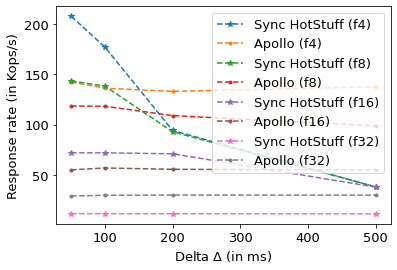

In [3]:
# Plot Tput vs Delta for f=4,8,16,32, w=40

faults = [4,8,16,32]
w = 40000

new_data = {}
new_data["x"] = []
new_data["y"] = []

shs_data = {}
apl_data = {}

from copy import deepcopy

Protocol="synchs"
for Faults in faults:
    File = f"{ROOT}/data/Jan20/c5/vary-d/F{Faults}/w{w}-{Faults}-{Protocol}-run-cleaned.csv"
    # print(File)
    shs_data[Faults] = deepcopy(new_data)
    with open(File) as f:
        rdr = reader(f)
        for row in rdr:
            delta = int(row[0])
            tput = float(row[1])/1000
            lat = float(row[2])
            shs_data[Faults]["x"].append(delta)
            shs_data[Faults]["y"].append(tput)

Protocol="apollo"
for Faults in faults:
    File = f"{ROOT}/data/Jan20/c5/vary-d/F{Faults}/w{w}-{Faults}-{Protocol}-run-cleaned.csv"
    # print(File)
    apl_data[Faults] = deepcopy(new_data)
    with open(File) as f:
        rdr = reader(f)
        for row in rdr:
            delta = int(row[0])
            tput = float(row[1])/1000
            lat = float(row[2])
            apl_data[Faults]["x"].append(delta)
            apl_data[Faults]["y"].append(tput)
# print(data)
# plt.rcParams["figure.figsize"] =(6.6, 4)
plt.rcParams.update({'font.size': 13})


for f in shs_data:
    plt.plot(shs_data[f]["x"], shs_data[f]["y"], linestyle="--", marker="*", label=f"Sync HotStuff (f{f})")
# for f in apl_data:
    plt.plot(apl_data[f]["x"], apl_data[f]["y"], linestyle="--", marker=".",label=f"Apollo (f{f})")
plt.legend()
plt.xlabel("Delta $\Delta$ (in ms)")
plt.ylabel("Response rate (in Kops/s)")
plt.savefig(f"{ROOT}/Plots/vary-d/t-vs-d.pdf", bbox_inches="tight")

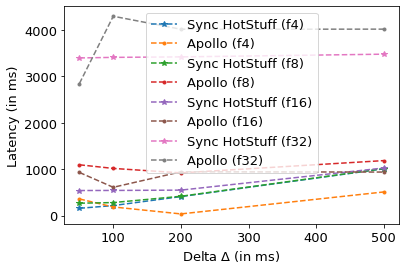

In [4]:
# Plot Tput vs Delta for f=4,8,16,32, w=40

faults = [4,8,16,32]
w = 40000

new_data = {}
new_data["x"] = []
new_data["y"] = []

shs_data = {}
apl_data = {}

from copy import deepcopy

Protocol="synchs"
for Faults in faults:
    File = f"{ROOT}/data/Jan20/c5/vary-d/F{Faults}/w{w}-{Faults}-{Protocol}-run-cleaned.csv"
    # print(File)
    shs_data[Faults] = deepcopy(new_data)
    with open(File) as f:
        rdr = reader(f)
        for row in rdr:
            delta = int(row[0])
            tput = float(row[1])/1000
            lat = float(row[2])
            shs_data[Faults]["x"].append(delta)
            shs_data[Faults]["y"].append(lat)

Protocol="apollo"
for Faults in faults:
    File = f"{ROOT}/data/Jan20/c5/vary-d/F{Faults}/w{w}-{Faults}-{Protocol}-run-cleaned.csv"
    # print(File)
    apl_data[Faults] = deepcopy(new_data)
    with open(File) as f:
        rdr = reader(f)
        for row in rdr:
            delta = int(row[0])
            tput = float(row[1])/1000
            lat = float(row[2])
            apl_data[Faults]["x"].append(delta)
            apl_data[Faults]["y"].append(lat)
# print(data)
# plt.rcParams["figure.figsize"] =(6.6, 4)
plt.rcParams.update({'font.size': 13})


for f in shs_data:
    plt.plot(shs_data[f]["x"], shs_data[f]["y"], linestyle="--", marker="*", label=f"Sync HotStuff (f{f})")
# for f in apl_data:
    plt.plot(apl_data[f]["x"], apl_data[f]["y"], linestyle="--", marker=".",label=f"Apollo (f{f})")
plt.legend()
plt.xlabel("Delta $\Delta$ (in ms)")
plt.ylabel("Latency (in ms)")
plt.savefig(f"{ROOT}/Plots/vary-d/l-vs-d.pdf", bbox_inches="tight")